In [65]:
#Import all packages for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests 
import tweepy 
import json
import time
import os
import datetime
import seaborn as sns

# Gather Data Programatically

In [158]:
# Read in csv to pd Dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [159]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [160]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [161]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [162]:
# Create file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [163]:
predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')


In [164]:
consumer_key = 'XwzL5M7nPXThUzSnLwAwVV0Hx'
consumer_secret = 'YEhoXrHUOWFrZeVPhbDcviWXn3Dl3YQhq5KNv40l0fTpukNgQK'
access_token = '1377614154-MJkxmpMpsKgIFkHFORPKGdFI1R5PcznCvdXyCOA'
access_secret = 'dp90TZUnYV2EAWL9KROGrr1YN0lEyRPu2LJ5x2GTarUq4'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [165]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

Used this stack overflow for help with the following for loop:
https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

## The code below was supplied by Udacity.ben

In [10]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'XwzL5M7nPXThUzSnLwAwVV0Hx'
consumer_secret = 'YEhoXrHUOWFrZeVPhbDcviWXn3Dl3YQhq5KNv40l0fTpukNgQK'
access_token = '1377614154-MJkxmpMpsKgIFkHFORPKGdFI1R5PcznCvdXyCOA'
access_secret = 'dp90TZUnYV2EAWL9KROGrr1YN0lEyRPu2LJ5x2GTarUq4'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [166]:
selected_attr = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                   'favorites': json_data['favorite_count'],
                   'retweets': json_data['retweet_count']})
tweet_selected_attr = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets'])
tweet_selected_attr.head(10)

,tweet_id,favorites,retweets
0,892420643555336193,35888,7608
1,892177421306343426,30946,5631
2,891815181378084864,23294,3728
3,891689557279858688,39134,7774
4,891327558926688256,37391,8380
5,891087950875897856,18844,2806
6,890971913173991426,10943,1828
7,890729181411237888,60414,16998
8,890609185150312448,25929,3869
9,890240255349198849,29603,6615


In [167]:
tweet_selected_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2330 non-null   int64
 1   favorites  2330 non-null   int64
 2   retweets   2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Gathering Summary:
    

### Assessing data

In [168]:
# Print some random examples
twitter_archive.sample(20)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
1079,739238157791694849,NaN,NaN,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,None,None,None
1656,683357973142474752,NaN,NaN,2016-01-02 18:43:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683357973...,10,10,None,None,None,None,None
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714258258...,10,10,Travis,None,None,None,None
629,794355576146903043,NaN,NaN,2016-11-04 01:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Butter. She can have wh...,7.887659e+17,4.196984e+09,2016-10-19 15:37:03 +0000,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
353,831309418084069378,NaN,NaN,2017-02-14 01:09:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter and his son Montoya. Scooter ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831309418...,12,10,Scooter,None,None,None,None
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,10,10,None,None,None,None,None
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
1050,743210557239623680,NaN,NaN,2016-06-15 22:36:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743210557...,10,10,Kayla,None,None,None,None


In [169]:
# Assessing the data programmaticaly
twitter_archive.info()
twitter_archive.describe()
twitter_archive['rating_numerator'].value_counts()
twitter_archive['rating_denominator'].value_counts()
twitter_archive['name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Scott        1
Sailor       1
Ricky        1
Tove         1
Ester        1
Name: name, Length: 957, dtype: int64

In [170]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [171]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [172]:
predictions.info()
predictions['jpg_url'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/C7IalMVX0AATKRD.jpg                                            1
https://pbs.twimg.com/media/C5XBp19WYAA5a_v.jpg                                            1
https://pbs.twimg.com/media/CnIQXdYWgAAnsZZ.jpg                                            1
https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg                                            1
https://pbs.twimg.com/ext_tw_video_thumb/683834825250320385/pu/img/yZd

In [173]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [174]:
twitter_archive[twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [175]:
tweet_selected_attr.head()


,tweet_id,favorites,retweets
0,892420643555336193,35888,7608
1,892177421306343426,30946,5631
2,891815181378084864,23294,3728
3,891689557279858688,39134,7774
4,891327558926688256,37391,8380



### Data Quality Issues


#### Twitter_archive dataset
* 1: Variables timestamp and retweeted_status_timestamp should be a datetime instead of String:  Convert in cleaning process.
* 2: Variables in_reply_status_id, in_reply_to_user_id, retweeted_status_user_id, retweetede_status_id:  These variables should be integers instead of floats.
* 3: Name column has no missing data or incomplete data example: 'none'.
* 4: Many Nulls represented as 'None' in the columns 'doggo', 'floofer', 'pupper', 'puppo'
* 5: Rating_numerator and rating_denominator variables contain numerous errors. 
* 6: Delete all unneccisary colemns that wont be used
* 7: Remove retweets

#### image_prediction dataset

* 8: We have missing values from the prediction datase 2075 observations in the image prediction dataset and 2356 from the Twitter_archive dataset.

* 9: We want to issolate the breeds out of the predictions.




###  Tidiness Issues

* We need to combine the last 4 variables 'doggo', 'floofer', 'pupper', 'puppo'
* We need to clean up tweet_id into str and merge the dataframes

# Cleaning dataset


#### Copy datasets so we dont overwrite the originals

In [199]:
#Copy the Dataset
twitter_archive_master = twitter_archive.copy()
image_predictions_copy = predictions.copy()
tweet_data_copy = tweet_selected_attr.copy()

#### Define 1: 
**Remove Retweets since we wont use them in our analysis.**

**Code 1**

In [200]:
# Clean Issue 1
twitter_archive_master = twitter_archive_master[pd.isnull(twitter_archive_master['retweeted_status_user_id'])]

print(sum(twitter_archive_master.retweeted_status_user_id.value_counts()))

twitter_archive_master = twitter_archive_master.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

0


#### Test 1

In [201]:
# Test 1 
twitter_archive_master.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Define 2: 
**Merge the 4 dog stagers into one column.**

#### Code 2

In [202]:
# Merge the 4 dog stage names into one column
twitter_archive_master['dog_stage'] = twitter_archive_master['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_master = twitter_archive_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test 2

In [203]:
twitter_archive_master.loc[(twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,pupper
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,NaN
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo


In [217]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   category           
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   float64            
 9   name                   2175 non-null   object             
 10  dog_stage              364 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(4), int6

#### Define 3:
**Fix the datatypes in the dataset to allow for easier analysis.**

#### Code 3:

In [205]:
# Clean 3: Use pandas to fix datatypes
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])
twitter_archive_master['source'] = twitter_archive_master['source'].astype('category')
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].astype('category')
twitter_archive_master['rating_numerator'] = twitter_archive_master['rating_numerator'].astype(float)
twitter_archive_master['rating_denominator'] = twitter_archive_master['rating_denominator'].astype(float)

#### Test 3 

In [206]:
# Test 3
twitter_archive_master.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                datetime64[ns, UTC]
source                              category
text                                  object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
dog_stage                           category
dtype: object

#### Define 4: 
**Merge the dataset to make it easier to work with.**

#### Code 4:

In [207]:
# Clean 4 Use pandas merge function to merge the dataframes
twitter_merge = pd.merge(twitter_archive_master, image_predictions_copy, on = ['tweet_id'], how = 'inner')
twitter_merge = pd.merge(twitter_merge, tweet_data_copy, on = 'tweet_id', how = 'inner')

#### Test 4

In [208]:
twitter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1987 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1987 non-null   datetime64[ns, UTC]
 4   source                 1987 non-null   category           
 5   text                   1987 non-null   object             
 6   expanded_urls          1987 non-null   object             
 7   rating_numerator       1987 non-null   float64            
 8   rating_denominator     1987 non-null   float64            
 9   name                   1987 non-null   object             
 10  dog_stage              324 non-null    category           
 11  jpg_url                1987 non-null   object           

#### Define 5: 
**Remove Errors with the dog's names.**

**Code 5**

In [219]:
# Clean 5
twitter_merge.name = twitter_merge.name.str.replace('^[a-z]+', 'None')

**Test 5**

In [220]:
# Test 5
twitter_merge.name.value_counts()

None        644
Cooper       10
Charlie      10
Oliver       10
Lucy          9
           ... 
Godzilla      1
Stefan        1
Snicku        1
Robin         1
Vince         1
Name: name, Length: 912, dtype: int64

#### Define 6: 
**Clean ratings from the image prediction dataset.**

**Code 6**

In [211]:
# Clean 6
# https://github.com/kdow/WeRateDogs/blob/master/wrangle_act.ipynb
# find all tweets with more than one rating
id_list_double_rating = twitter_merge['tweet_id'][twitter_merge.text.str.contains
                                              ( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].tolist()
id_list_double_rating

# create a new column for the corrected rating_numerator
twitter_merge['rating_numerator_new'] = twitter_merge['rating_numerator']

# replace false rating_numerator values with NaN for all tweets with double ratings
twitter_merge['rating_numerator_new'] = np.where(twitter_merge['tweet_id'].isin(id_list_double_rating),
                                                         np.NaN, twitter_merge['rating_numerator_new'])

/Users/chaseeby/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


**Test 6**

In [221]:
# test 6
twitter_merge.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                datetime64[ns, UTC]
source                              category
text                                  object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
dog_stage                           category
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2                                    object
p2_conf                              float64
p2_dog                                  bool
p3                                    object
p3_conf                              float64
p3_dog                                  bool
favorites 

#### Define 7: 
**Isolate the breed of the dog and make a new column.**

**Code 7**

In [213]:
# Clean 6
# Isolate the breed of the dog
def prediction_integration(s):
    if s.p1_dog:
        return s.p1
    elif s.p2_dog:
        return s.p2
    else:
        return s.p3

In [214]:
twitter_merge['breed'] = twitter_merge.apply(prediction_integration, axis=1)

#### Test 7

In [215]:
twitter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1987 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1987 non-null   datetime64[ns, UTC]
 4   source                 1987 non-null   category           
 5   text                   1987 non-null   object             
 6   expanded_urls          1987 non-null   object             
 7   rating_numerator       1987 non-null   float64            
 8   rating_denominator     1987 non-null   float64            
 9   name                   1987 non-null   object             
 10  dog_stage              324 non-null    category           
 11  jpg_url                1987 non-null   object           

#### Define 8: 
**Drop in_reply that we arent going to use to visualize.**

**Code 8**

In [223]:
# Clean 8
twitter_merge.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

**Test 8**

In [224]:
# Test 8
twitter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1987 non-null   int64              
 1   timestamp             1987 non-null   datetime64[ns, UTC]
 2   source                1987 non-null   category           
 3   text                  1987 non-null   object             
 4   expanded_urls         1987 non-null   object             
 5   rating_numerator      1987 non-null   float64            
 6   rating_denominator    1987 non-null   float64            
 7   name                  1987 non-null   object             
 8   dog_stage             324 non-null    category           
 9   jpg_url               1987 non-null   object             
 10  img_num               1987 non-null   int64              
 11  p1                    1987 non-null   object             
 12  p1_con

# Visualizing the Dataset


In [144]:
# Make plot sizes larger
plt.rcParams['figure.figsize'] = 8, 6

# Use Colorblind for our pallet(Reduce the amount of different colors for our plots)
colorblind = sns.color_palette('colorblind')[0]


### Plot Dog Descriptions

Text(0, 0.5, 'Count of Descriptions')

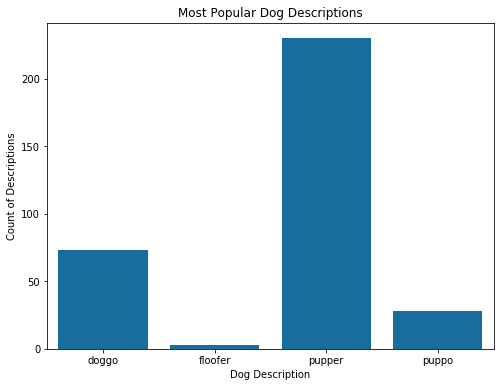

In [145]:
sns.countplot(data=twitter_merge, x='dog_stage', color = colorblind).set_title('Most Popular Dog Descriptions')
plt.xlabel('Dog Description')
plt.ylabel('Count of Descriptions')

**Unsurprisingly Pupper is the most popular stage of a dogs life. As this chart shows it by far the most popular stage of the doggo's life**

## What are the highest correlated features

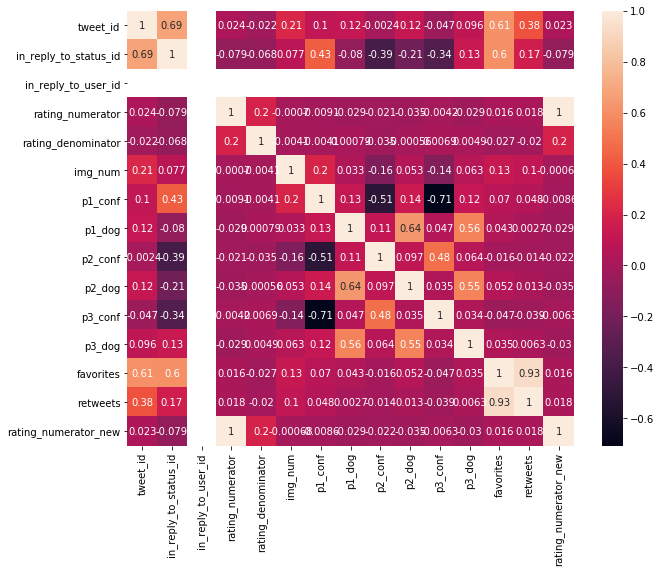

In [98]:
# Use seaborn's heat map to observe linear correlations between characterizations
plt.figure(figsize=(10, 8))
feature_corr = twitter_merge.corr()
sns.heatmap(feature_corr, annot=True)

**Looking at the correlation matrix we can see that there are not many highly correlated interactions.  
highest correlated variables happen betweeen favorites and retweets**

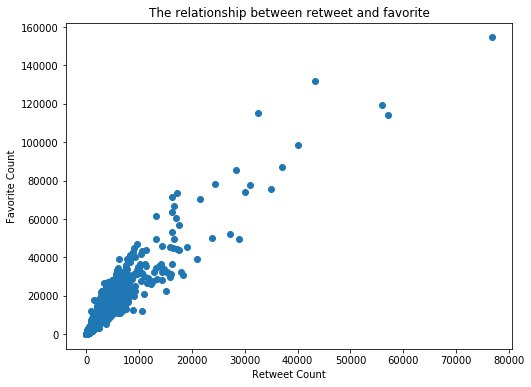

In [101]:
plt.scatter(twitter_merge.retweets, twitter_merge.favorites)
plt.title('The relationship between retweet and favorite')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.show()


**Here is another look at the correlation between favorite and retweet.  This scatter plot is a good way to visualize correlations between two variables.**

In [225]:
twitter_merge.to_csv('twitter_archive_master.csv')